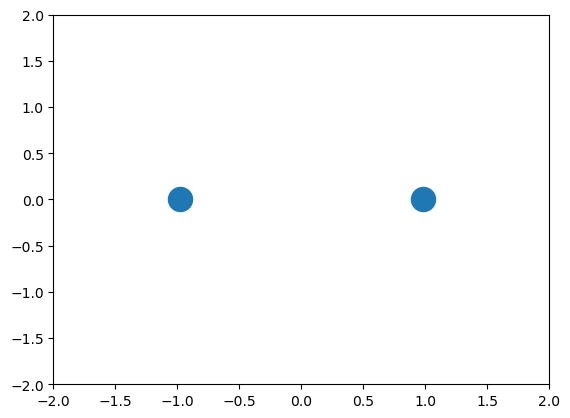

In [8]:
import math

# Vector operations
class Vector2D:
    def __init__(self, x=0.0, y=0.0):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector2D(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector2D(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):
        return Vector2D(self.x * scalar, self.y * scalar)

    __rmul__ = __mul__

    def dot(self, other):
        return self.x * other.x + self.y * other.y

    def magnitude(self):
        return math.hypot(self.x, self.y)

    def normalized(self):
        mag = self.magnitude()
        if mag == 0:
            return Vector2D()
        return Vector2D(self.x / mag, self.y / mag)

    def __repr__(self):
        return f"Vector2D({self.x:.3f}, {self.y:.3f})"

# Material point (body)
class Body:
    def __init__(self, mass, position, velocity=Vector2D()):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.force_accumulator = Vector2D()

    def apply_force(self, force):
        # F = dp/dt
        self.force_accumulator += force

    def clear_forces(self):
        self.force_accumulator = Vector2D()

# Physics engine
class PhysicsEngine:
    def __init__(self, bodies, dt=0.01):
        self.bodies = bodies
        self.dt = dt

    def step(self):
        # Integrate forces and update velocity & position (Euler)
        for b in self.bodies:
            # Compute acceleration: a = F / m
            a = Vector2D(b.force_accumulator.x / b.mass, b.force_accumulator.y / b.mass)
            # Update velocity
            b.velocity += a * self.dt
            # Update position
            b.position += b.velocity * self.dt
            # Reset forces
            b.clear_forces()
        # Collision detection & resolution
        self.handle_collisions()

    def handle_collisions(self):
        # Simple elastic collisions for circular bodies
        for i in range(len(self.bodies)):
            for j in range(i + 1, len(self.bodies)):
                b1, b2 = self.bodies[i], self.bodies[j]
                # Assume each body has a radius attribute
                if hasattr(b1, 'radius') and hasattr(b2, 'radius'):
                    delta = b2.position - b1.position
                    dist = delta.magnitude()
                    if dist < (b1.radius + b2.radius) and dist > 0:
                        # Resolve overlap
                        overlap = 0.5 * (b1.radius + b2.radius - dist)
                        dir_norm = delta.normalized()
                        b1.position -= dir_norm * overlap
                        b2.position += dir_norm * overlap

                        # Compute relative velocity
                        v_rel = b2.velocity - b1.velocity
                        # Compute impulse scalar
                        m1, m2 = b1.mass, b2.mass
                        impulse = (2 * v_rel.dot(dir_norm)) / (m1 + m2)
                        # Apply impulse for elastic collision
                        b1.velocity += dir_norm * (impulse * m2)
                        b2.velocity -= dir_norm * (impulse * m1)

# Example setup and visualization using matplotlib
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation

    # Create two bodies
    b1 = Body(mass=1.0, position=Vector2D(-1, 0), velocity=Vector2D(1, 0))
    b1.radius = 0.2
    b2 = Body(mass=1.0, position=Vector2D(1, 0), velocity=Vector2D(-1, 0))
    b2.radius = 0.2

    engine = PhysicsEngine([b1, b2], dt=0.01)

    fig, ax = plt.subplots()
    scat = ax.scatter([], [], s=300)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    def update(frame):
        engine.step()
        xs = [b.position.x for b in engine.bodies]
        ys = [b.position.y for b in engine.bodies]
        scat.set_offsets(list(zip(xs, ys)))
        return scat,

    anim = FuncAnimation(fig, update, frames=500, interval=20, blit=True)
    plt.show()